In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. load data

In [2]:
#load data
normal_x = pd.read_csv('normal.csv',index_col=-1)
normal_x  = normal_x .drop(labels=['Unnamed: 0'],axis=1)
normal_x .head()
cancer_x = pd.read_csv('cancer.csv',index_col=-1)
cancer_x  = cancer_x .drop(labels=['Unnamed: 0'],axis=1)
cancer_x .head()

,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,TCGA-PE-A5DC-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
name,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.344457,0.279162,0.338604,0.329097,0.348688,0.352619,0.362908,0.333274,0.358078,0.348278,...,0.348209,0.365727,0.357452,0.357108,0.361027,0.407680,0.378072,0.341225,0.389800,0.369942
HIF3A,0.230441,0.296027,0.266469,0.222966,0.199041,0.189336,0.294398,0.195636,0.273255,0.310293,...,0.437589,0.250514,0.302447,0.438616,0.208545,0.222194,0.308907,0.409210,0.210038,0.256915
RNF10,0.342776,0.360117,0.361642,0.400123,0.362811,0.356769,0.343229,0.346959,0.369171,0.366830,...,0.362284,0.371054,0.377865,0.357225,0.363122,0.349523,0.358485,0.348396,0.370938,0.367643
RNF11,0.360772,0.436315,0.369633,0.359572,0.364719,0.352147,0.349340,0.338929,0.363664,0.350443,...,0.386137,0.369671,0.340643,0.374828,0.351568,0.333820,0.349281,0.384341,0.349904,0.364326
RNF13,0.339369,0.367657,0.354124,0.353614,0.344907,0.353734,0.350848,0.353627,0.334780,0.349793,...,0.369157,0.344696,0.344703,0.374030,0.357930,0.338491,0.355567,0.375608,0.326741,0.333353


In [3]:
# Create an array with 100 zeros
zeros = np.zeros(normal_x.shape[1])
# Create an array with 500 ones
ones = np.ones(cancer_x.shape[1])
# Concatenate the arrays to form a single 1-d vector
y = np.concatenate((zeros, ones))
print(y.shape)

(1677,)


In [4]:
#identify the genes shared by all the training samples
intersection=[]
normal_gene = normal_x.index
cancer_gene = cancer_x.index
intersection=set(normal_gene).intersection(set(cancer_gene))
normal_x = normal_x.loc[intersection]
cancer_x = cancer_x.loc[intersection]

In [5]:
X = pd.merge(normal_x, cancer_x, left_index=True, right_index=True)

### 2.filtered the genes, only retain the ones in EGF pathway

In [7]:
l_bar = X.columns

index = ["EGFR","ERBB2","GRB2","SOS1","SOS2"]
X = X.loc[index,]
l_gene = X.index
X = np.array(X).T
#data_x = pd.DataFrame(data_x.T, columns = l_gene, index = l_bar)
#data_x = 

In [8]:
X.shape

(1677, 5)

In [8]:
y=y.reshape(y.shape[0],1)
X = np.concatenate((X, y), axis=1)
l_gene = list(l_gene)
l_gene.append("breast_cancer")

### 3.1 PC

In [9]:
from causallearn.search.ConstraintBased.PC import pc
# default parameters
cg = pc(X)

  0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G,labels=l_gene)
pyd.write_png('simple_test_pc_egf_part.png')

### 3.2 FCI

In [13]:
from causallearn.search.ConstraintBased.FCI import fci

# default parameters
g, edges = fci(np.array(X))

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X5
X6 --> X3
X5 --> X6


In [14]:
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g,labels=l_gene)
pdy.write_png('simple_test_fci_egf_part.png')

### 3.3 GES

In [15]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
Record = ges(X)

# or customized parameters
#Record = ges(X, score_func, maxP, parameters)



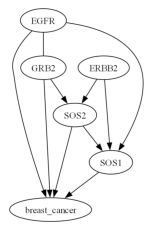

In [16]:
# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'],labels=l_gene)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test_ges_egf_part.png')

### 3.4 The Groud-truth graph

In [ ]:
import numpy as np
import pydot

# Example adjacency matrix
adjacency_matrix = pd.read_csv("adjacency_matrix_egf.csv",index_col=0)
adjacency_matrix = np.array(adjacency_matrix).T


# Create a directed graph
graph = pydot.Dot(graph_type='digraph')

# Add nodes to the graph
for i in range(len(adjacency_matrix)):
    node = pydot.Node(str(i),label=l_gene[i])
    graph.add_node(node)

# Add directed edges to the graph based on the adjacency matrix
for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix[i])):
        if adjacency_matrix[i][j] != 0:
            edge = pydot.Edge(str(i), str(j))
            graph.add_edge(edge)

# Save the graph to a file
graph.write_png('directed_graph_egf.png')